In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit.lab import *
from nbodykit import setup_logging, style
from nbodykit import use_mpi
from nbodykit.io.gadget import Gadget1File
from nbodykit.lab import ArrayMesh
from nbodykit.source.catalog import Gadget1Catalog

import numpy as np
import math

import time

from scipy import integrate
from scipy import interpolate

import matplotlib.pyplot as plt
plt.style.use(style.notebook)

In [3]:
#masaki params
#Omega_m = 0.3156
#Omega_L = 0.6844
#lambdaz = 0.01
#factor = 1.

#planck2015 params
Omega_m = 0.3089
Omega_L = 0.6911
lambdaz = 0.01
factor = 1.

def Hubble(a):
    matter = Omega_m/a**3
    Lambda = Omega_L
    return np.sqrt(matter+Lambda)

def growth_int(a):
    return 1./(a*Hubble(a))**3

def growth_D(a):
    factor = 5*Omega_m*Hubble(a)/2
    return factor*integrate.quad(growth_int, 0, a)[0]

def rel_D(z):
    a = 1/(1+z)
    return growth_D(a)/growth_D(1)

In [5]:
pow = {}

for force in ['treepm256', 'treepm512', 'pm256', 'pm512','pm1024','pm2048','pm4096']:
    for kind in ['iso', 'mmp', 'ppm']:
        pow[force+'_'+kind+'_p0'] = np.loadtxt(f'/home/yinli/csit/analysis/response/planck2015/250/z0_{force}_{kind}_p0.dat')
        pow[force+'_'+kind+'_p2'] = np.loadtxt(f'/home/yinli/csit/analysis/response/planck2015/250/z0_{force}_{kind}_p2.dat')

In [5]:
pow = {}

for force in ['treepm2048']:
    for kind in ['iso', 'mmp', 'ppm']:
        pow[force+'_'+kind+'_p0'] = np.loadtxt(f'/home/yinli/csit/analysis/response/planck2015/1000/z0_{force}_{kind}_p0.dat')
        pow[force+'_'+kind+'_p2'] = np.loadtxt(f'/home/yinli/csit/analysis/response/planck2015/1000/z0_{force}_{kind}_p2.dat')

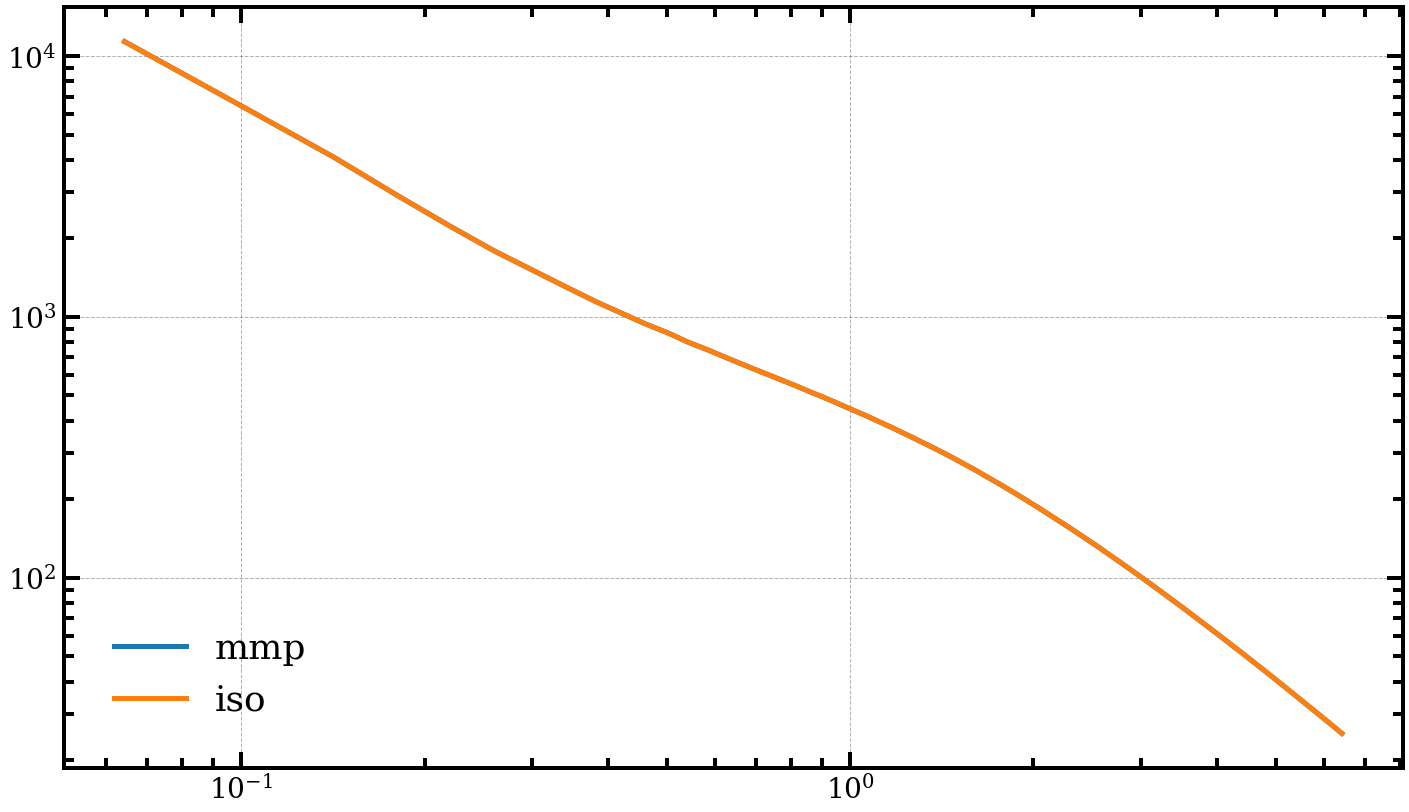

In [6]:
plt.plot(pow['treepm2048_mmp_p0'][0], pow['treepm2048_mmp_p0'][1], label="mmp")
#plt.plot(pow['pm512_iso_p0'][0], pow['pm512_iso_p0'][1], label="PM512 iso")
plt.plot(pow['treepm2048_iso_p0'][0], pow['treepm2048_iso_p0'][1], label="iso")

plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=18)
plt.xscale('log')
plt.yscale('log')

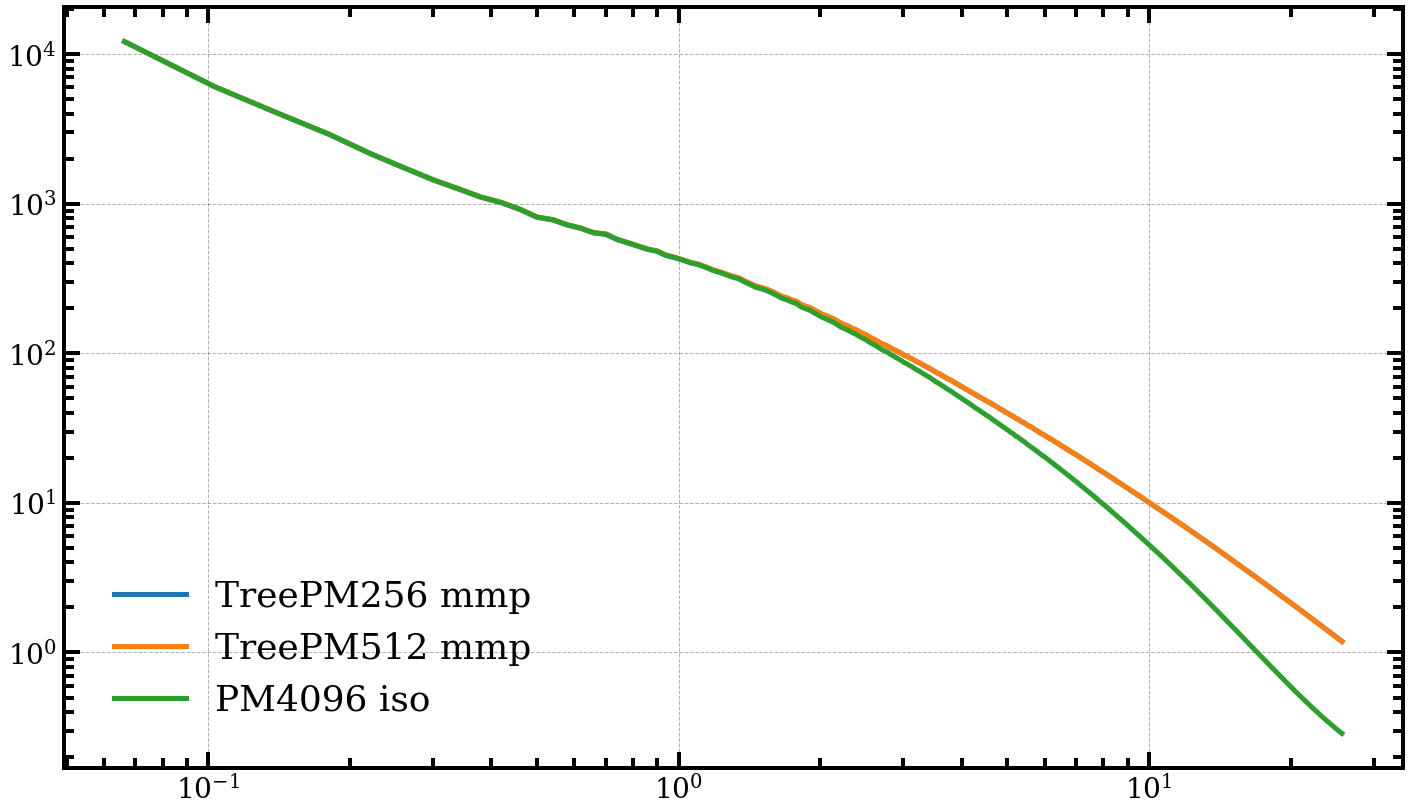

In [36]:
plt.plot(pow['treepm256_mmp_p0'][0], pow['treepm256_mmp_p0'][1], label="TreePM256 mmp")
plt.plot(pow['treepm512_mmp_p0'][0], pow['treepm512_mmp_p0'][1], label="TreePM512 mmp")
#plt.plot(pow['pm512_iso_p0'][0], pow['pm512_iso_p0'][1], label="PM512 iso")
plt.plot(pow['pm4096_iso_p0'][0], pow['pm4096_iso_p0'][1], label="PM4096 iso")

plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=18)
plt.xscale('log')
plt.yscale('log')

In [7]:
Gk = {}

for force in ['treepm2048']:
    Gk[force] = np.array([pow[force+'_iso_p0'][0], (pow[force+'_mmp_p2'][1] - pow[force+'_ppm_p2'][1])/(2*lambdaz*pow[force+'_iso_p0'][1]*rel_D(0))])
    np.savetxt(f'/home/yinli/csit/analysis/response/planck2015/1000/Gk_z0_{force}.dat', Gk[force])

In [6]:
Gk = {}

for force in ['treepm256','treepm512','pm256','pm512','pm1024','pm2048','pm4096']:
    Gk[force] = np.array([pow[force+'_iso_p0'][0], (pow[force+'_mmp_p2'][1] - pow[force+'_ppm_p2'][1])/(2*lambdaz*pow[force+'_iso_p0'][1]*rel_D(0))])
    np.savetxt(f'/home/yinli/csit/analysis/response/planck2015/250/Gk_z0_{force}.dat', Gk[force])

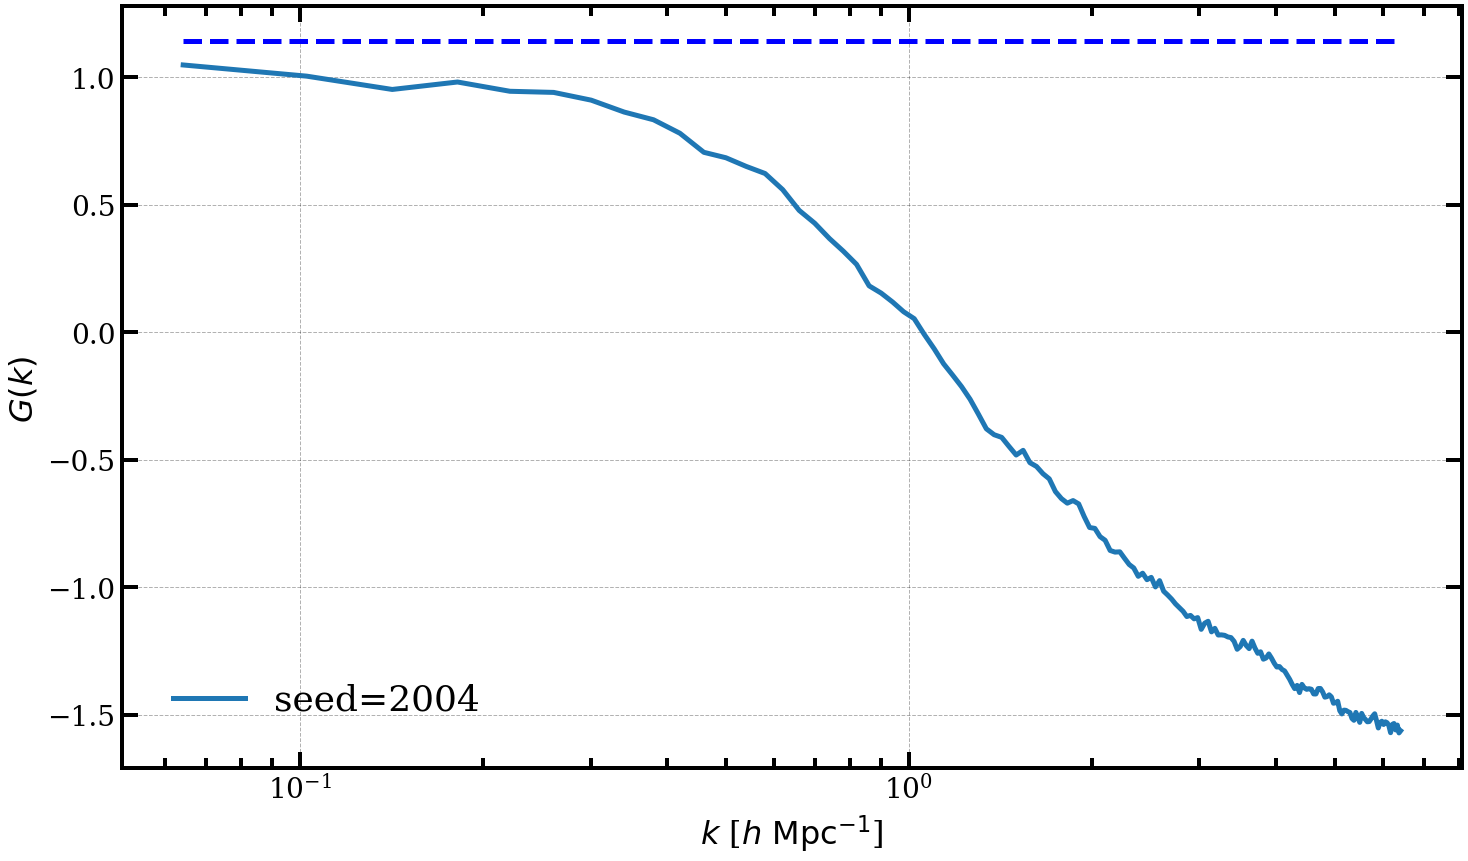

In [8]:
plt.plot(Gk['treepm2048'][0], Gk['treepm2048'][1], label="seed=2004")
#plt.plot(Gk['pm4096'][0], Gk['pm4096'][1], label="PM4096")
#plt.plot(Gk['pm256'][0], Gk['pm256'][1], label="PM256")
#plt.plot(Gk['pm1024'][0], Gk['pm1024'][1], label="PM1024")


plt.hlines([8./7.], Gk['treepm2048'][0,0], Gk['treepm2048'][0,-1], "blue", linestyles='dashed')     # hlines

plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=18)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$G(k)$ ")
plt.xscale('log')
#plt.savefig('/home/yinli/csit/analysis/response/planck2015/1000/Gk_compare_treepm.pdf')

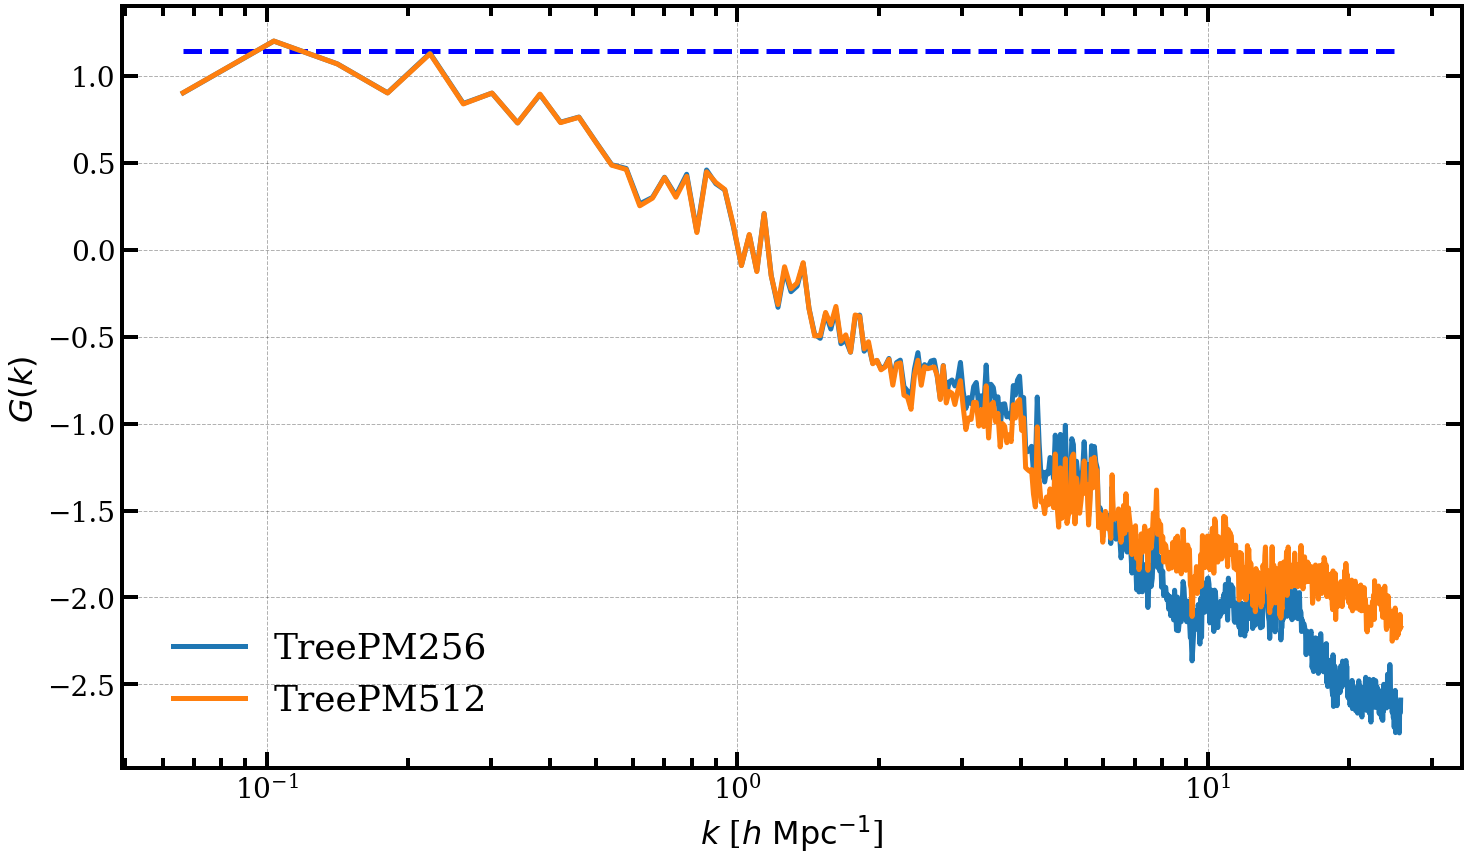

In [22]:
plt.plot(Gk['treepm256'][0], Gk['treepm256'][1], label="TreePM256")
plt.plot(Gk['treepm512'][0], Gk['treepm512'][1], label="TreePM512")
#plt.plot(Gk['pm4096'][0], Gk['pm4096'][1], label="PM4096")
#plt.plot(Gk['pm256'][0], Gk['pm256'][1], label="PM256")
#plt.plot(Gk['pm1024'][0], Gk['pm1024'][1], label="PM1024")


plt.hlines([8./7.], Gk['treepm256'][0,0], Gk['treepm256'][0,-1], "blue", linestyles='dashed')     # hlines

plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=18)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$G(k)$ ")
plt.xscale('log')
plt.savefig('/home/yinli/csit/analysis/response/planck2015/250/Gk_compare_treepm.pdf')

In [8]:
np.log10(Gk['treepm256'][0,0])

-1.1778663900572262

In [9]:
np.log10(Gk['treepm256'][0,-1])

1.4099332448452262

In [16]:
n_bin = 13
logpow = {}
logmink = -1.1
logmaxk = 1.4

logpow['k'] = np.logspace(logmink, logmaxk, n_bin)

for force in ['treepm256', 'treepm512', 'pm256', 'pm512','pm1024','pm2048','pm4096']:
    for kind in ['iso', 'mmp', 'ppm']:
        logpow[force+'_'+kind] = np.zeros(n_bin)
        
for i in range(n_bin):
    for j in range(pow['treepm256_iso_p0'][0].size):
        if(i==0 and pow['treepm256_iso_p0'][0,j] <= logpow['k'][i]):
            for force in ['treepm256', 'treepm512', 'pm256', 'pm512','pm1024','pm2048','pm4096']:
                logpow[force+'_iso'][i] = logpow[force+'_iso'][i] + pow[force+'_iso_p0'][1,j]
                logpow[force+'_mmp'][i] = logpow[force+'_mmp'][i] + pow[force+'_mmp_p2'][1,j]
                logpow[force+'_ppm'][i] = logpow[force+'_ppm'][i] + pow[force+'_ppm_p2'][1,j]
        elif(logpow['k'][i-1] <= pow['treepm256_iso_p0'][0,j] and pow['treepm256_iso_p0'][0,j] <= logpow['k'][i]):
            for force in ['treepm256', 'treepm512', 'pm256', 'pm512','pm1024','pm2048','pm4096']:
                logpow[force+'_iso'][i] = logpow[force+'_iso'][i] + pow[force+'_iso_p0'][1,j]
                logpow[force+'_mmp'][i] = logpow[force+'_mmp'][i] + pow[force+'_mmp_p2'][1,j]
                logpow[force+'_ppm'][i] = logpow[force+'_ppm'][i] + pow[force+'_ppm_p2'][1,j]

In [17]:
logGk = {}

for force in ['treepm256','treepm512','pm256','pm512','pm1024','pm2048','pm4096']:
    logGk[force] = np.array([logpow['k'], (logpow[force+'_mmp'] - logpow[force+'_ppm'])/(2*lambdaz*logpow[force+'_iso']*rel_D(0))])
    np.savetxt(f'/home/yinli/csit/analysis/response/planck2015/250/logGk_z0_{force}.dat', logGk[force])

logkbin_new = numpy.logspace(logmink+(logmaxk-logmink)/(2*(n_bin-1)), logmaxk+(logmaxk+logmink)/(2*(n_bin-1)), n_bin)

In [18]:
logpow['treepm512_iso']

array([12153.75976562,  6048.02547771,  6935.12158505,  5335.20863576,
        5902.40193192,  4832.86759625,  4999.75938102,  4751.47360464,
        3628.8755102 ,  2552.46876402,  1637.17823648,   964.7947066 ,
         529.04155731])

In [19]:
logGk['treepm256']

array([[ 7.94328235e-02,  1.28331519e-01,  2.07332157e-01,
         3.34965439e-01,  5.41169527e-01,  8.74312458e-01,
         1.41253754e+00,  2.28209297e+00,  3.68694506e+00,
         5.95662144e+00,  9.62350626e+00,  1.55477184e+01,
         2.51188643e+01],
       [ 9.03337423e-01,  1.20089317e+00,  9.99664131e-01,
         9.74961646e-01,  7.19725388e-01,  3.47833721e-01,
         9.85315946e-03, -5.31378704e-01, -7.73881297e-01,
        -1.15429300e+00, -1.84169907e+00, -2.04246052e+00,
        -2.44034216e+00]])

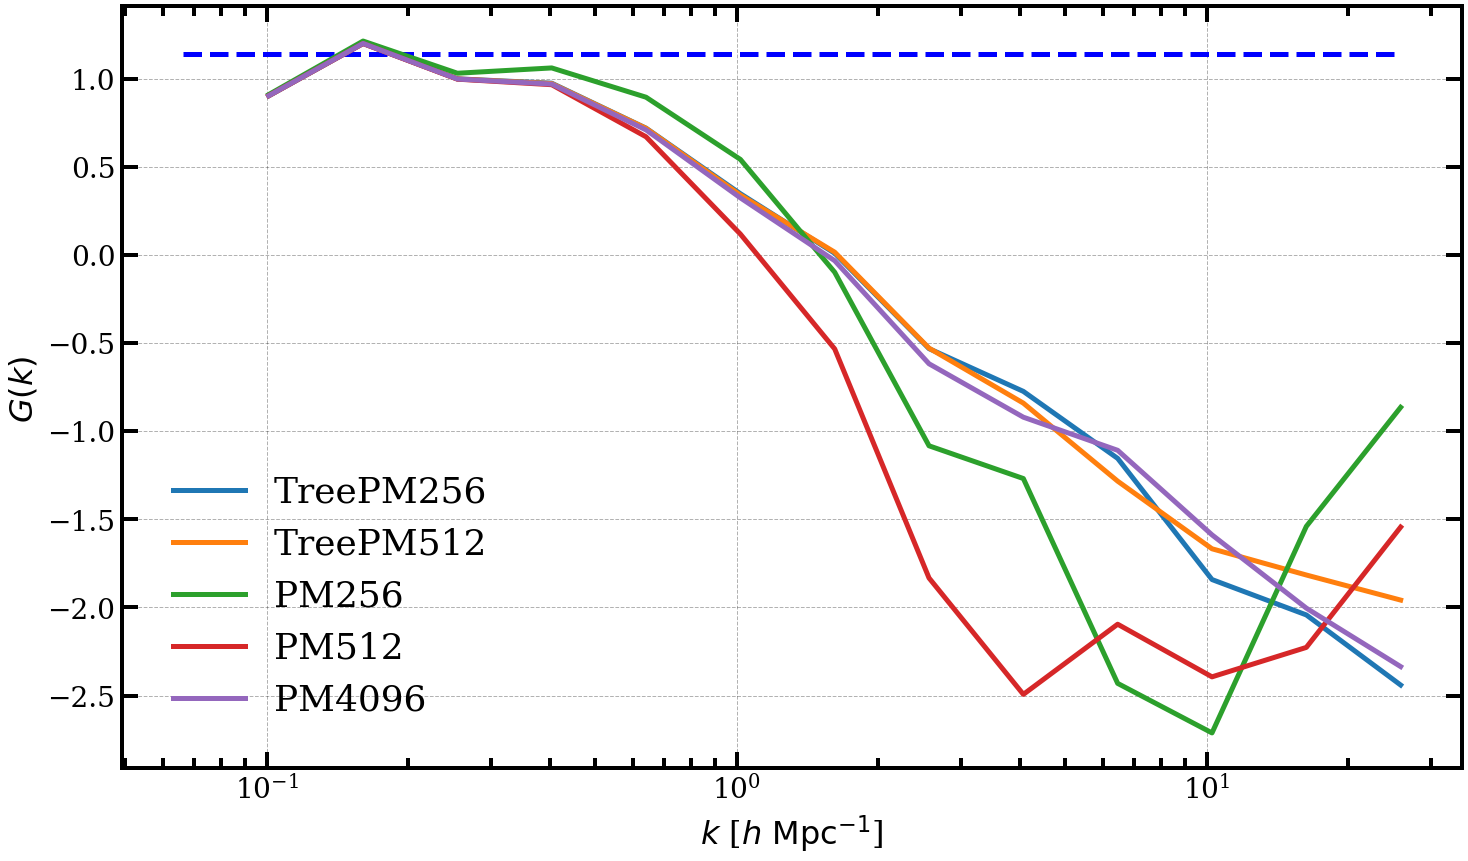

In [28]:
logGk = {}

for force in ['treepm256','treepm512','pm256','pm512','pm1024','pm2048','pm4096']:
    logGk[force] = np.array([logpow['k'], (logpow[force+'_mmp'] - logpow[force+'_ppm'])/(2*lambdaz*logpow[force+'_iso']*rel_D(0))])
    np.savetxt(f'/home/yinli/csit/analysis/response/planck2015/250/logGk_z0_{force}.dat', logGk[force])

logkbin_new = numpy.logspace(logmink+(logmaxk-logmink)/(2*(n_bin-1)), logmaxk+(logmaxk+logmink)/(2*(n_bin-1)), n_bin)

plt.plot(logkbin_new, logGk['treepm256'][1], label="TreePM256")
plt.plot(logkbin_new, logGk['treepm512'][1], label="TreePM512")
plt.plot(logkbin_new, logGk['pm256'][1], label="PM256")
plt.plot(logkbin_new, logGk['pm512'][1], label="PM512")
#plt.plot(logkbin_new, logGk['pm1024'][1], label="PM1024")
#plt.plot(logkbin_new, logGk['pm2048'][1], label="PM2048")
plt.plot(logkbin_new, logGk['pm4096'][1], label="PM4096")

#plt.plot(Gk['pm4096'][0], Gk['pm4096'][1], label="PM4096")
#plt.plot(Gk['pm256'][0], Gk['pm256'][1], label="PM256")
#plt.plot(Gk['pm1024'][0], Gk['pm1024'][1], label="PM1024")


plt.hlines([8./7.], Gk['treepm256'][0,0], Gk['treepm256'][0,-1], "blue", linestyles='dashed')     # hlines

plt.xscale('log')
#plt.legend(loc=0)
plt.legend(bbox_to_anchor=(0, 0), loc='lower left', borderaxespad=1, fontsize=18)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$G(k)$ ")
plt.savefig('/home/yinli/csit/analysis/response/planck2015/250/Gk_compare_dklog_treepm_pm.pdf')

In [35]:
import subprocess
subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'response.ipynb'])

CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'python', 'response.ipynb'], returncode=0)